In [1]:
import sys  
sys.path.insert(0, '../')  # insert path to import the following modules

import tensorflow as tf
import flammkuchen as fl
import matplotlib.pyplot as plt
import numpy as np
from skimage.metrics import structural_similarity as ssim

from src.dataloader import DataLoader
from utils.params import Params

from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, UpSampling2D, Concatenate
from tensorflow.keras.models import Model

%load_ext autoreload
%autoreload 2

## Create tf-model

In [2]:
input_layer = Input((64, 64, 1))

layer = 4
filter_base = 8

to_concat = []

x = input_layer

for i in range(layer):
    x = Conv2D(filter_base*2**i, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(filter_base*2**i, (3, 3), activation='relu', padding='same')(x)
    to_concat.append(x) # for skip-connection
    x = MaxPool2D()(x)

x = Conv2D(filter_base*2**4, (3, 3), activation='relu', padding='same')(x)

for i in range(layer):
    x = UpSampling2D()(x)
    x = Concatenate(name=f'skip_{i}')([x, to_concat.pop()])
    x = Conv2D(filter_base*2**(layer-i-1), (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(filter_base*2**(layer-i-1), (3, 3), activation='relu', padding='same')(x)
    
x = Conv2D(filters=1, kernel_size=1, activation='tanh', padding='same')(x)

model = Model(input_layer, x)

In [3]:
# load a dataset as a list of two numpy arrays
params = Params("params.json")

dataloader = DataLoader(params, 4)
(trainA, trainB), (valA, valB), (testA, testB) = dataloader.get_data_paired()


Currently loading data: P1_1


  0%|          | 0/1819 [00:00<?, ?it/s]

  0%|          | 0/1819 [00:00<?, ?it/s]


Currently loading data: P1_2


  0%|          | 0/1748 [00:00<?, ?it/s]

  0%|          | 0/1750 [00:00<?, ?it/s]


Currently loading data: P1_3


  0%|          | 0/1758 [00:00<?, ?it/s]

  0%|          | 0/1759 [00:00<?, ?it/s]


Currently loading data: P2_1


  0%|          | 0/1988 [00:00<?, ?it/s]

  0%|          | 0/1990 [00:00<?, ?it/s]


Currently loading data: P2_2


  0%|          | 0/1880 [00:00<?, ?it/s]

  0%|          | 0/1881 [00:00<?, ?it/s]


Currently loading data: P2_3


  0%|          | 0/1819 [00:00<?, ?it/s]

  0%|          | 0/1819 [00:00<?, ?it/s]


Currently loading data: P3_1


  0%|          | 0/2157 [00:00<?, ?it/s]

  0%|          | 0/2157 [00:00<?, ?it/s]


Currently loading data: P3_2


  0%|          | 0/2088 [00:00<?, ?it/s]

  0%|          | 0/2089 [00:00<?, ?it/s]


Currently loading data: P3_3


  0%|          | 0/2116 [00:00<?, ?it/s]

  0%|          | 0/2113 [00:00<?, ?it/s]


Currently loading data: P4_1


  0%|          | 0/2406 [00:00<?, ?it/s]

  0%|          | 0/2406 [00:00<?, ?it/s]


Currently loading data: P4_2


  0%|          | 0/2434 [00:00<?, ?it/s]

  0%|          | 0/2438 [00:00<?, ?it/s]


Currently loading data: P4_3


  0%|          | 0/2427 [00:00<?, ?it/s]

  0%|          | 0/2427 [00:00<?, ?it/s]


Currently loading data: P5_1


  0%|          | 0/2055 [00:00<?, ?it/s]

  0%|          | 0/2056 [00:00<?, ?it/s]


Currently loading data: P5_2


  0%|          | 0/1921 [00:00<?, ?it/s]

  0%|          | 0/1922 [00:00<?, ?it/s]


Currently loading data: P5_3


  0%|          | 0/1955 [00:00<?, ?it/s]

  0%|          | 0/1955 [00:00<?, ?it/s]


Currently loading data: P6_1


  0%|          | 0/1882 [00:00<?, ?it/s]

  0%|          | 0/1882 [00:00<?, ?it/s]


Currently loading data: P6_2


  0%|          | 0/1788 [00:00<?, ?it/s]

  0%|          | 0/1790 [00:00<?, ?it/s]


Currently loading data: P6_3


  0%|          | 0/1804 [00:00<?, ?it/s]

  0%|          | 0/1805 [00:00<?, ?it/s]

## Train Autoencoder

In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.MeanSquaredError())

def scheduler(epoch, lr):
    if epoch < 35:
        return lr
    else:
        return lr * np.exp(-0.1)
    
lr_callback = tf.keras.callbacks.LearningRateScheduler(schedule=scheduler, verbose=1)
   
history = model.fit(trainA, trainB, callbacks=[lr_callback], epochs=100, batch_size=128, 
                    validation_data=(valA, valB))

Epoch 1/100

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
193/193 [==============================] - 15s 38ms/step - loss: 0.0449 - val_loss: 0.0385
Epoch 2/100

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
193/193 [==============================] - 7s 34ms/step - loss: 0.0238 - val_loss: 0.0391
Epoch 3/100

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
193/193 [==============================] - 7s 35ms/step - loss: 0.0223 - val_loss: 0.0292
Epoch 4/100

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
193/193 [==============================] - 7s 34ms/step - loss: 0.0205 - val_loss: 0.0311
Epoch 5/100

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
193/193 [==============================] - 6s 33ms/step - loss: 0.0200 - val_loss: 0.0258
Epoch 6/100

Epoch 00006: LearningRateScheduler reducing learnin

193/193 [==============================] - 7s 35ms/step - loss: 0.0091 - val_loss: 0.0285
Epoch 89/100

Epoch 00089: LearningRateScheduler reducing learning rate to 4.516581731171895e-06.
193/193 [==============================] - 6s 34ms/step - loss: 0.0091 - val_loss: 0.0285
Epoch 90/100

Epoch 00090: LearningRateScheduler reducing learning rate to 4.086772043991721e-06.
193/193 [==============================] - 6s 33ms/step - loss: 0.0091 - val_loss: 0.0285
Epoch 91/100

Epoch 00091: LearningRateScheduler reducing learning rate to 3.697864361133402e-06.
193/193 [==============================] - 6s 33ms/step - loss: 0.0091 - val_loss: 0.0285
Epoch 92/100

Epoch 00092: LearningRateScheduler reducing learning rate to 3.3459659477785512e-06.
193/193 [==============================] - 7s 34ms/step - loss: 0.0091 - val_loss: 0.0286
Epoch 93/100

Epoch 00093: LearningRateScheduler reducing learning rate to 3.02755521723057e-06.
193/193 [==============================] - 6s 33ms/step - lo

In [20]:
# save the trained model
model.save("autoencoder_audio2nsa.hdf5")

## Load Autoencoder and evaluate its performance

In [9]:
from tensorflow.keras.models import load_model
model = load_model("autoencoder_audio2nsa.hdf5")

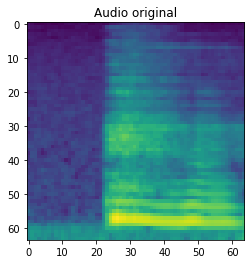

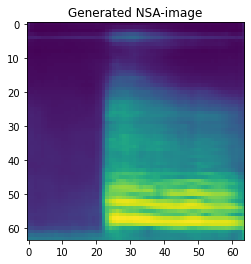

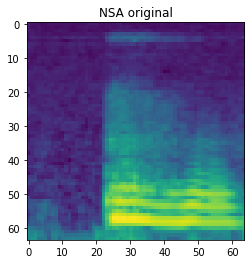

SSIM Audio and generated image: 0.47675140907723557
SSIM NSA and generated image: 0.631752088909128


In [23]:
n = 150

plt.title("Audio original")
plt.imshow(testA[n])
plt.show()
pred = model.predict(testA[n:n+1])
plt.title("Generated NSA-image")
plt.imshow(pred[0])
plt.show()
plt.title("NSA original")
plt.imshow(testB[n])
plt.show()

ssim_audio = ssim(pred[0].squeeze(), testA[n].squeeze())
ssim_nsa = ssim(pred[0].squeeze(), testB[n].squeeze())

print(f"SSIM Audio and generated image: {ssim_audio}")
print(f"SSIM NSA and generated image: {ssim_nsa}")

d = dict(audio=testA[n], nsa=testB[n], generated_nsa=pred[0], ssim_audio=ssim_audio, ssim_nsa=ssim_nsa)
fl.save("results_autoencoder.vfp", d)

In [29]:
ssim_audio = []
ssim_nsa = []

for t_A, t_B in zip(testA, testB):
    pred = model.predict(t_A[None, ...])
    
    ssim_audio.append(ssim(pred[0].squeeze(), t_A.squeeze()))
    ssim_nsa.append(ssim(pred[0].squeeze(), t_B.squeeze()))
    
print(np.mean(ssim_audio))
print(np.mean(ssim_nsa))

0.37606081060974506
0.5810144714000209


## Plot training/validation loss

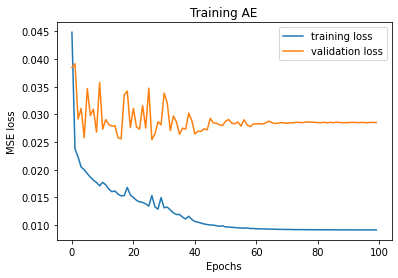

In [31]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel("Epochs")
plt.ylabel("MSE loss")
plt.title("Training AE")
plt.legend()
plt.savefig("training_autoencoder.png", dpi=300, bbox_inches='tight')

In [6]:
d = dict(training_history=history.history)
fl.save("training_history_autoencoder.vfp", d)